## 花哨的索引

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [5]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [8]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [9]:
X = np.arange(12).reshape((3, 4))

In [10]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [16]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## 组合索引

In [17]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [18]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [19]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 示例

In [20]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

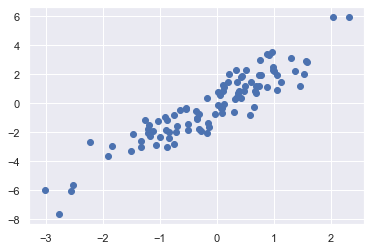

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1])

In [22]:
indices = np.random.choice(X.shape[0], 20, replace=False)

In [23]:
indices

array([33, 36, 51,  3, 72, 44, 53, 52, 59, 41, 91, 11, 89, 28, 62, 43, 87,
        8, 54, 25])

In [27]:
selection = X[indices]
selection.shape

(20, 2)

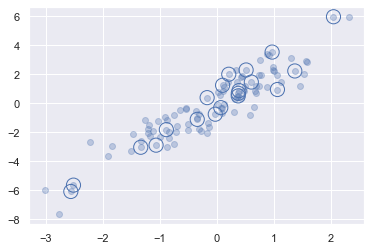

In [29]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', edgecolor='b', s = 200)

## 索引和修改

In [30]:
x = np.arange(10)
i = np.array([2, 2, 8, 4])
x[i] = 99
print(x)

[ 0  1 99  3 99  5  6  7 99  9]


In [32]:
x[i] -= 10
print(x)

[ 0  1 79  3 79  5  6  7 79  9]


In [35]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 2. 0. 1. 0. 0. 0. 1. 0.]


## 示例

In [38]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)
np.add.at(counts, i, 1)

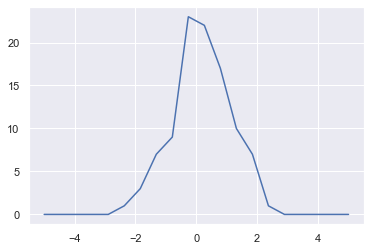

In [47]:
plt.plot(bins, counts);

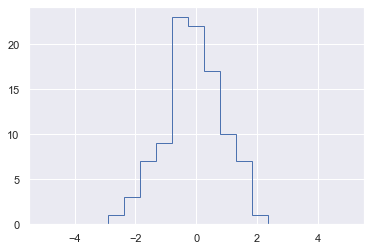

In [44]:
plt.hist(x, bins, histtype='step');

In [48]:
%timeit counts, edge = np.histogram(x, bins)

15.3 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

8.03 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
x = np.random.randn(1000000)
%timeit counts, edges = np.histogram(x, bins)

53.6 ms ± 450 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

66.1 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
